# Hypotheses Test 2

#### **We aim to study how age influences the adaptation towards specificity in memory representations, investigating whether this adaptation increases or decreases with age, ultimately influencing performance in memory tasks.**

#### $H_0$: There is no significant relationship between age and the adaptation towards specificity in memory representations.
#### $H_A$: Adaptation towards specificity in memory representations increases/decreases with age. 

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

##  Data Processing

In [3]:
e1_sub_ages = pd.read_csv("../data/e1/e1_sub_ages.csv") 
e1_memory = pd.read_csv("../data/e1/e1_memory_data.csv")

# Merge dataframes
memory_merged = pd.merge(e1_memory, e1_sub_ages, on='subject_id')

In [4]:
e1_sub_ages.head()

,subject_id,age
0,3768,8.04
1,3770,8.10
2,3855,16.83
3,3853,16.94
4,3898,22.15


In [4]:
e1_memory.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0


In [5]:
memory_merged.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay,age
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0,8.04
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0,8.04
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0,8.04
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0,8.04
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0,8.04


In [5]:
# Check for missing values
print("\nMissing values in memory data:")
print(memory_merged.isnull().sum())

# Remove missing values if any
memory_merged.dropna(inplace=True)


Missing values in memory data:
subject_id              0
task_part               0
block_order             0
block_condition         0
category_type           0
num_stim_rep            0
image                   0
category                0
task_block              0
stim_num                0
correct_mem_response    0
mem_response            0
confidence              0
rt                      0
mem_acc                 0
conf_number             0
conf_rating             0
foil_type               0
memory_delay            0
age                     0
dtype: int64


In [6]:
memory_merged['subject_id'].nunique()

151

In [7]:
memory_data = memory_merged[['age', 'block_condition', 'mem_acc']]
memory_data.head()

,age,block_condition,mem_acc
0,8.04,2,1.0
1,8.04,2,1.0
2,8.04,2,0.0
3,8.04,2,1.0
4,8.04,2,0.0


In [8]:
memory_data.dtypes

age                float64
block_condition      int64
mem_acc            float64
dtype: object

In [8]:
# split into age groups
memory_merged['age_group'] = pd.cut(memory_merged['age'], bins=[0, 13, 18, float('inf')], labels=['Children', 'Adolescents', 'Adults'])
memory_merged.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,...,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay,age,age_group
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,...,old,definitely,1866.0,1.0,1.0,4.0,old,7.0,8.04,Children
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,...,old,definitely,1792.0,1.0,1.0,4.0,old,7.0,8.04,Children
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,...,new,definitely,3074.0,0.0,1.0,1.0,old,7.0,8.04,Children
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,...,old,definitely,1411.0,1.0,1.0,4.0,old,7.0,8.04,Children
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,...,new,maybe,3348.0,0.0,0.0,2.0,old,7.0,8.04,Children


## Statistical Tests

We have seen from the previous hypothesis that: 
- There is a statistically significant association between specificity (`block_condition`) and memory representation(`memory_accuracy`).

- There is a highly significant relationship between memory representations (`memory accuracy` and `confidence level` i.e conf_number) and specificity i.e `block_condition`

So now we check if this effect changes with age. 

### Age Vs Memory Accuracy

#### Chi-Square Test of Independence

We already know that there's a significant relationship between `memory_accuracy` and `block_conditon` or `confidence level` and `block_conditon`. We now check if there significant relationship between age group and memory accuracy.

To test the relationship between age and memory accuracy, we'll use the Chi-Square Test of Independence. 

- This test is appropriate because both age group and memory accuracy can be made categorical variables, and we want to assess if there is an association between them.

In [9]:
# Convert 'mem_accuracy' to categorical: 1 for correct, 0 for incorrect
memory_merged['mem_acc'] = np.where(memory_merged['mem_acc'] == 1.0, 'Correct', 'Incorrect')
memory_merged.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,...,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay,age,age_group
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,...,old,definitely,1866.0,Correct,1.0,4.0,old,7.0,8.04,Children
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,...,old,definitely,1792.0,Correct,1.0,4.0,old,7.0,8.04,Children
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,...,new,definitely,3074.0,Incorrect,1.0,1.0,old,7.0,8.04,Children
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,...,old,definitely,1411.0,Correct,1.0,4.0,old,7.0,8.04,Children
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,...,new,maybe,3348.0,Incorrect,0.0,2.0,old,7.0,8.04,Children


In [10]:
contingency_table = pd.crosstab(memory_merged['age_group'], memory_merged['mem_acc'])

# Perform the Chi-Square Test of Independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Test Results for Age vs. Memory Accuracy:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square Test Results for Age vs. Memory Accuracy:
Chi-square Statistic: 17.64074574808893
P-value: 0.0001476932789732151


#### Cramer's V effect size

In [11]:
# Calculate Cramer's V for effect size
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print("Cramer's V (Effect Size):", cramer_v)

Cramer's V (Effect Size): 0.03604330245034824


> The Chi-square test results indicate a significant relationship between age and memory accuracy (p-value < 0.05). 

> However, the effect size (Cramer's V) is small (0.036), suggesting a weak association between age and memory accuracy.

#### Visualisation

/tmp/ipykernel_54773/3106984775.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probabilities = memory_merged.groupby(['age_group', 'mem_acc']).size().div(len(memory_merged)).reset_index(name='probability')
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


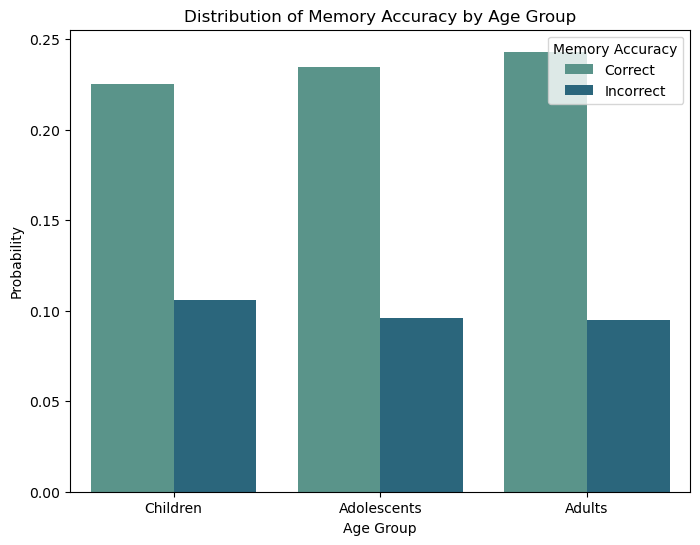

In [24]:
# Compute the probabilities
probabilities = memory_merged.groupby(['age_group', 'mem_acc']).size().div(len(memory_merged)).reset_index(name='probability')

# Plot the distribution of memory accuracy by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=probabilities, x='age_group', y='probability', hue='mem_acc', palette='crest')
plt.title('Distribution of Memory Accuracy by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.legend(title='Memory Accuracy', loc='upper right')
plt.show()


/tmp/ipykernel_54773/1648535451.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probabilities = memory_merged[memory_merged['mem_acc'] == 'Correct'].groupby('age_group').size().div(len(memory_merged[memory_merged['mem_acc'] == 'Correct'])).reset_index(name='probability')
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


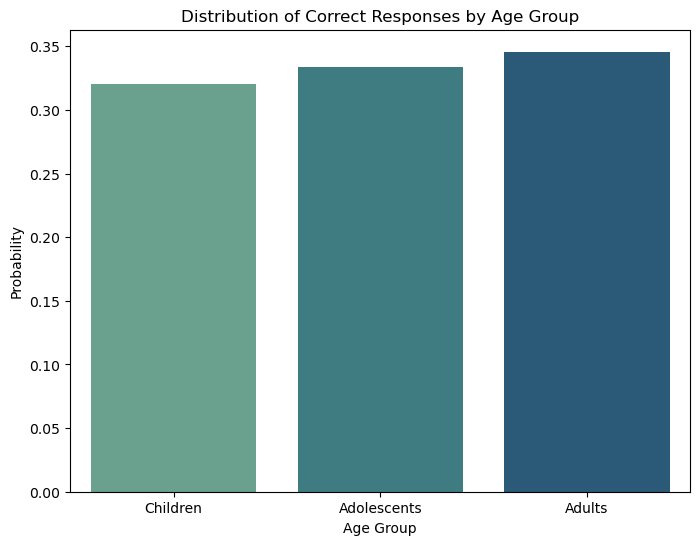

In [23]:
# Compute the probabilities
probabilities = memory_merged[memory_merged['mem_acc'] == 'Correct'].groupby('age_group').size().div(len(memory_merged[memory_merged['mem_acc'] == 'Correct'])).reset_index(name='probability')

# Plot the distribution of correct responses by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=probabilities, x='age_group', y='probability', palette='crest')
plt.title('Distribution of Correct Responses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.show()


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


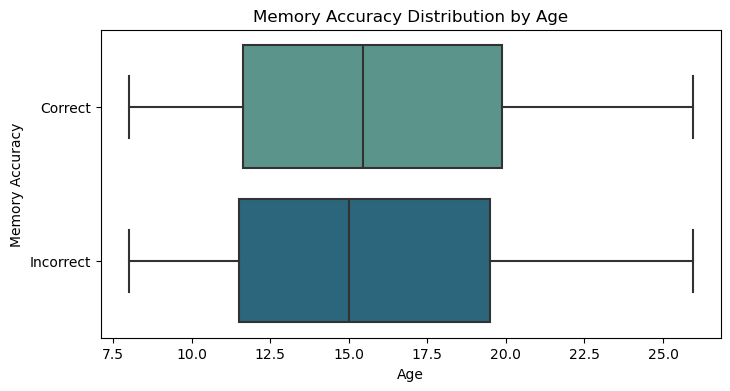

In [42]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=memory_merged, x='age', y='mem_acc', palette='crest')
plt.title('Memory Accuracy Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Memory Accuracy')
plt.show()


> The box plot depicts the distribution of memory accuracy scores for different age groups. The median score increases as age increases, which suggests that people performed better on the memory accuracy task as they got older.

> It appears that memory accuracy tends to increase with age, as there are more correct responses observed in the adult age group compared to adolescents and children.

### Assess the association between `age` and `memory accuracy` within each specificity condition (category predictive or exemplar predictive)

We want to determine if there is a significant relationship between age and memory accuracy within each specificity condition

#### Chi-Square Test of Independence

We can perform a chi-square test of independence to assess the association between `age_group` (categorical) and `mem_acc` (categorical: correct or incorrect) within each `block_condition` (categorical: category predictive or exemplar predictive). 

**Chi-square Test of Independence for Category Predictive**


In [16]:
# Convert 'block_condition' to categorical
memory_merged['mem_acc'] = memory_merged['mem_acc'].astype('category')
memory_merged['block_condition'] = memory_merged['block_condition'].astype('category')
memory_merged.dtypes

subject_id                 int64
task_part                 object
block_order                int64
block_condition         category
category_type             object
num_stim_rep             float64
image                     object
category                  object
task_block                object
stim_num                   int64
correct_mem_response      object
mem_response              object
confidence                object
rt                       float64
mem_acc                 category
conf_number              float64
conf_rating              float64
foil_type                 object
memory_delay             float64
age                      float64
age_group               category
dtype: object

In [17]:
category_predictive_data = memory_merged[memory_merged['block_condition'] == 1]
contingency_table_category = pd.crosstab(category_predictive_data['age_group'], category_predictive_data['mem_acc'])

chi2_category, p_value_category, _, _ = chi2_contingency(contingency_table_category)
print("Chi-square Test Results for Age vs. Memory Accuracy (Category Predictive):")
print("Chi-square Statistic:", chi2_category)
print("P-value:", p_value_category)


Chi-square Test Results for Age vs. Memory Accuracy (Category Predictive):
Chi-square Statistic: 2.227170431741837
P-value: 0.32837953656660995


**Chi-square Test of Independence for Exemplar Predictive** 

In [18]:
exemplar_predictive_data = memory_merged[memory_merged['block_condition'] == 2]
contingency_table_exemplar = pd.crosstab(exemplar_predictive_data['age_group'], exemplar_predictive_data['mem_acc'])

chi2_exemplar, p_value_exemplar, _, _ = chi2_contingency(contingency_table_exemplar)
print("Chi-square Test Results for Age vs. Memory Accuracy (Exemplar Predictive):")
print("Chi-square Statistic:", chi2_exemplar)
print("P-value:", p_value_exemplar)

Chi-square Test Results for Age vs. Memory Accuracy (Exemplar Predictive):
Chi-square Statistic: 22.905107367593224
P-value: 1.062231390776101e-05


#### Cramer's V effect size

In [29]:
n = contingency_table_category.sum().sum()
cramer_v = np.sqrt(chi2_category / (n * (min(contingency_table_category.shape) - 1)))
print("Cramer's V (Category Predictive):", cramer_v)


Cramer's V (Category Predictive): 0.018112309126598333


In [30]:
n = contingency_table_exemplar.sum().sum()
cramer_v = np.sqrt(chi2_exemplar / (n * (min(contingency_table_exemplar.shape) - 1)))
print("Cramer's V (Exemplar Predictive):", cramer_v)


Cramer's V (Exemplar Predictive): 0.05808062468930103


In [44]:
# For Category Predictive
category_predictive_counts = memory_merged[memory_merged['block_condition'] == 1].groupby(['age_group', 'mem_acc']).size()
print("Counts for Age vs. Memory Accuracy (Category Predictive):")
print(category_predictive_counts)


Counts for Age vs. Memory Accuracy (Category Predictive):
age_group    mem_acc  
Children     Correct      1525
             Incorrect     722
Adolescents  Correct      1570
             Incorrect     677
Adults       Correct      1590
             Incorrect     705
dtype: int64


/tmp/ipykernel_108533/1462656587.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_predictive_counts = memory_merged[memory_merged['block_condition'] == 1].groupby(['age_group', 'mem_acc']).size()


In [71]:
# For Exemplar Predictive
exemplar_predictive_counts = memory_merged[memory_merged['block_condition'] == 2].groupby(['age_group', 'mem_acc']).size()
print("Counts for Age vs. Memory Accuracy (Exemplar Predictive):")
print(exemplar_predictive_counts)

Counts for Age vs. Memory Accuracy (Exemplar Predictive):
age_group    mem_acc  
Children     Correct      1535
             Incorrect     714
Adolescents  Correct      1617
             Incorrect     630
Adults       Correct      1712
             Incorrect     582
dtype: int64


/tmp/ipykernel_108533/1412809568.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exemplar_predictive_counts = memory_merged[memory_merged['block_condition'] == 2].groupby(['age_group', 'mem_acc']).size()


#### Inferences

**For Category Predictive**:
> Chi-square Statistic: 2.23, 
    P-value: 0.33, 
    Cramer's V: 0.018
    
- The chi-square test does not show a significant relationship between age and memory accuracy within the Category Predictive specificity condition. 
- The p-value is greater than 0.05, indicating that there is no strong evidence to reject the null hypothesis. 
- The effect size (Cramer's V) is very small (0.018), suggesting a weak association between age and memory accuracy in this condition.

**For Exemplar Predictive**:
> Chi-square Statistic: 22.91,
    P-value: 0.00001,
    Cramer's V: 0.058

- The chi-square test reveals a significant relationship between age and memory accuracy. 
- The p-value is very low (close to zero), indicating strong evidence to reject the null hypothesis. 
- The effect size (Cramer's V) is larger (0.058), suggesting a weak to moderate association between age and memory accuracy in this condition.

In conclusion, while there is no significant relationship between age and memory accuracy within the Category Predictive condition, there is a significant association within the Exemplar Predictive specificity.

**Therefore, Adaptation towards specificity in memory representations increases with age only in case of Exemplar Predictive Specificity**

#### Post Hoc Tests

Now we perform **pairwise chi-square tests with Bonferroni correction** to compare memory accuracy between different age groups. 

This will help identify specific differences between age groups while accounting for multiple comparisons.

In [20]:

def pairwise_chi_square(data, group_col, response_col, block_condition_col):
    results = []
    block_conditions = data[block_condition_col].unique()
    for block_condition in block_conditions:
        block_condition_data = data[data[block_condition_col] == block_condition]
        age_group = block_condition_data[group_col].unique()
        for i in range(len(age_group)):
            for j in range(i + 1, len(age_group)):
                age_group1 = age_group[i]
                age_group2 = age_group[j]
                contingency_table = pd.crosstab(block_condition_data[group_col], block_condition_data[response_col])
                chi2, p_value, _, _ = chi2_contingency(contingency_table)
                results.append((block_condition, age_group1, age_group2, chi2, p_value))
    return results


In [21]:
# Perform pairwise chi-square tests with Bonferroni correction
pairwise_results = pairwise_chi_square(memory_merged, 'age_group', 'mem_acc', 'block_condition')

# Bonferroni correction for multiple comparisons
alpha = 0.05
results_corrected = multipletests([result[4] for result in pairwise_results], alpha=alpha, method='bonferroni')

print("Pairwise Chi-square Test Results with Bonferroni Correction:")
for i, result in enumerate(pairwise_results):
    block_condition, age_group1, age_group2, chi2, p_value = result
    rejected = results_corrected[0][i]
    print(f"Block Condition: {block_condition}, Age Groups: {age_group1} vs {age_group2}, Chi-square: {chi2}, P-value: {p_value}, Rejected: {rejected}")


Pairwise Chi-square Test Results with Bonferroni Correction:
Block Condition: 2, Age Groups: Children vs Adolescents, Chi-square: 22.905107367593224, P-value: 1.062231390776101e-05, Rejected: True
Block Condition: 2, Age Groups: Children vs Adults, Chi-square: 22.905107367593224, P-value: 1.062231390776101e-05, Rejected: True
Block Condition: 2, Age Groups: Adolescents vs Adults, Chi-square: 22.905107367593224, P-value: 1.062231390776101e-05, Rejected: True
Block Condition: 1, Age Groups: Children vs Adolescents, Chi-square: 2.227170431741837, P-value: 0.32837953656660995, Rejected: False
Block Condition: 1, Age Groups: Children vs Adults, Chi-square: 2.227170431741837, P-value: 0.32837953656660995, Rejected: False
Block Condition: 1, Age Groups: Adolescents vs Adults, Chi-square: 2.227170431741837, P-value: 0.32837953656660995, Rejected: False


**Exemplar Predictive**
- There is a significant difference in memory accuracy between children and adolescents (p < 0.001), as well as between children and adults (p < 0.001).
- Additionally, there is a significant difference in memory accuracy between adolescents and adults (p < 0.001).

**Category Predictive**
- No significant difference in memory accuracy was found between children and adolescents (p = 0.328), children and adults (p = 0.328), and adolescents and adults (p = 0.328).


**These results suggest that age significantly influences adaptation towards specificity in memory representations in Block Condition 2, but not in Block Condition 1.**


#### Visualisation

/tmp/ipykernel_54773/769286597.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probabilities_category = memory_merged[memory_merged['block_condition'] == 1].groupby(['age_group', 'mem_acc']).size().div(len(memory_merged[memory_merged['block_condition'] == 1])).reset_index(name='probability')
/tmp/ipykernel_54773/769286597.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probabilities_exemplar = memory_merged[memory_merged['block_condition'] == 2].groupby(['age_group', 'mem_acc']).size().div(len(memory_merged[memory_merged['block_condition'] == 2])).reset_index(name='probability')
/home/sruj/miniconda3/

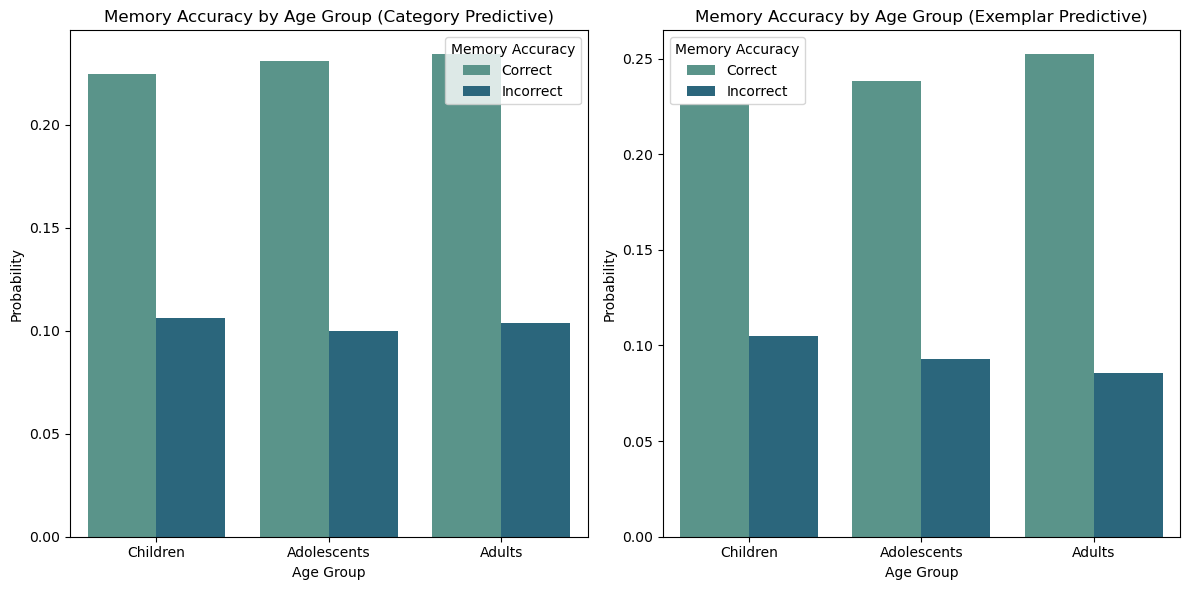

In [28]:
# Compute the probabilities for each memory accuracy level and age group within each block condition
probabilities_category = memory_merged[memory_merged['block_condition'] == 1].groupby(['age_group', 'mem_acc']).size().div(len(memory_merged[memory_merged['block_condition'] == 1])).reset_index(name='probability')
probabilities_exemplar = memory_merged[memory_merged['block_condition'] == 2].groupby(['age_group', 'mem_acc']).size().div(len(memory_merged[memory_merged['block_condition'] == 2])).reset_index(name='probability')

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot of memory accuracy by age group within Category Predictive
sns.barplot(data=probabilities_category, x='age_group', y='probability', hue='mem_acc', palette='crest', ax=axes[0])
axes[0].set_title('Memory Accuracy by Age Group (Category Predictive)')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Probability')
axes[0].legend(title='Memory Accuracy')

# Bar plot of memory accuracy by age group within Exemplar Predictive
sns.barplot(data=probabilities_exemplar, x='age_group', y='probability', hue='mem_acc', palette='crest', ax=axes[1])
axes[1].set_title('Memory Accuracy by Age Group (Exemplar Predictive)')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Probability')
axes[1].legend(title='Memory Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


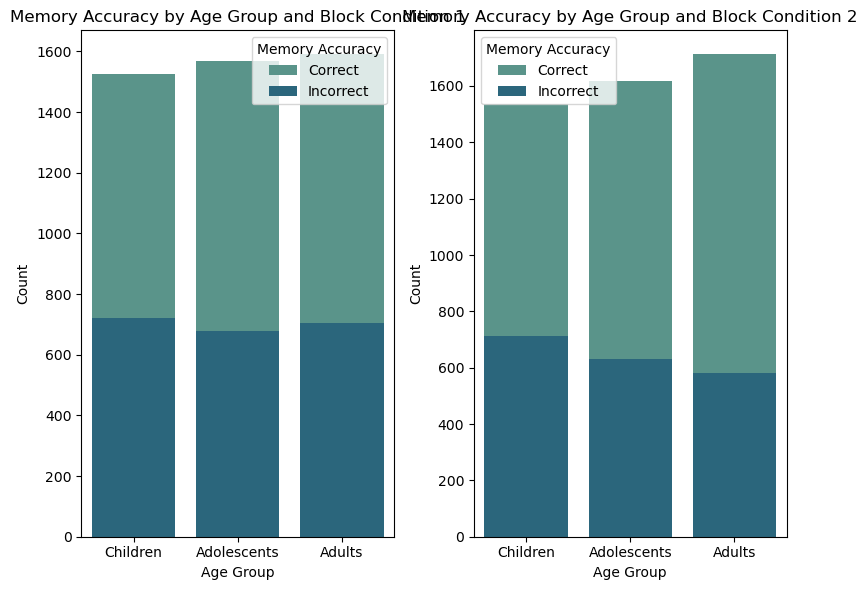

In [31]:
plt.figure(figsize=(8, 6))

# stack plot of memory accuracy by age group within Category Predictive
plt.subplot(1, 2, 1)
sns.countplot(data=memory_merged[memory_merged['block_condition'] == 1], x='age_group', hue='mem_acc', palette='crest', hue_order=['Correct', 'Incorrect'], dodge=False)
plt.title('Memory Accuracy by Age Group and Block Condition 1')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Memory Accuracy')

# stack plot of memory accuracy by age group within Exemplar Predictive
plt.subplot(1, 2, 2)
sns.countplot(data=memory_merged[memory_merged['block_condition'] == 2], x='age_group', hue='mem_acc', palette='crest', hue_order=['Correct', 'Incorrect'], dodge=False)
plt.title('Memory Accuracy by Age Group and Block Condition 2')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Memory Accuracy')

plt.tight_layout()
plt.show()

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


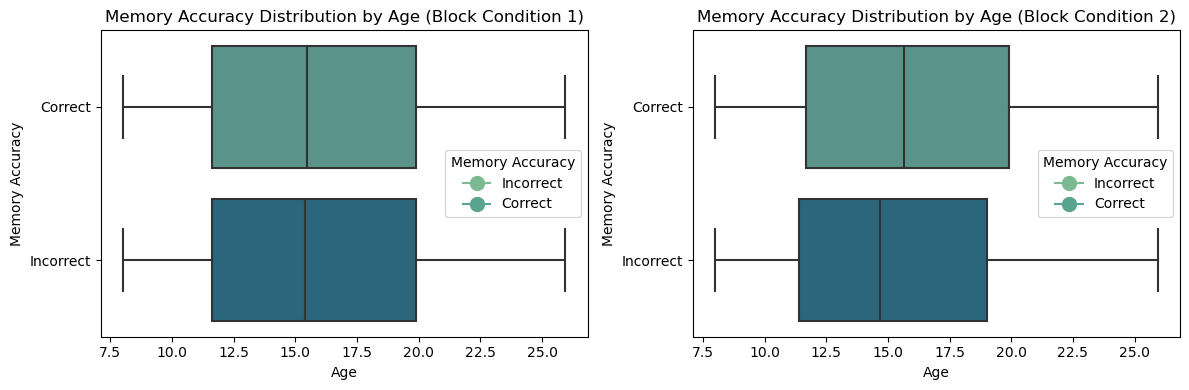

In [43]:
# box plot of memory accuracy by age group within Category Predictive
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=memory_merged[memory_merged['block_condition'] == 1], x='age', y='mem_acc', palette='crest')
legend_labels = ['Incorrect', 'Correct'] 
colors = sns.color_palette('crest') 
legend_handles = [plt.Line2D([0], [0], marker='o', color=colors[i], label=label, markersize=10) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Memory Accuracy')
plt.title('Memory Accuracy Distribution by Age (Block Condition 1)')
plt.xlabel('Age')
plt.ylabel('Memory Accuracy')

# box plot of memory accuracy by age group within Exemplar Predictive
plt.subplot(1, 2, 2)
sns.boxplot(data=memory_merged[memory_merged['block_condition'] == 2], x='age', y='mem_acc', palette='crest')
legend_labels = ['Incorrect', 'Correct'] 
colors = sns.color_palette('crest') 
legend_handles = [plt.Line2D([0], [0], marker='o', color=colors[i], label=label, markersize=10) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Memory Accuracy')
plt.title('Memory Accuracy Distribution by Age (Block Condition 2)')
plt.xlabel('Age')
plt.ylabel('Memory Accuracy')

plt.tight_layout()
plt.show()


> In Block Condition 2, the separation between the median for correct and incorrect responses indicates a clearer distinction between successful memory retrieval and errors. 

> The separation reflects a difference in overall accuracy between the two conditions.
Participants in Block Condition 2 achieved a higher overall accuracy rate, the median for correct responses is further separated from the median for incorrect responses.

/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


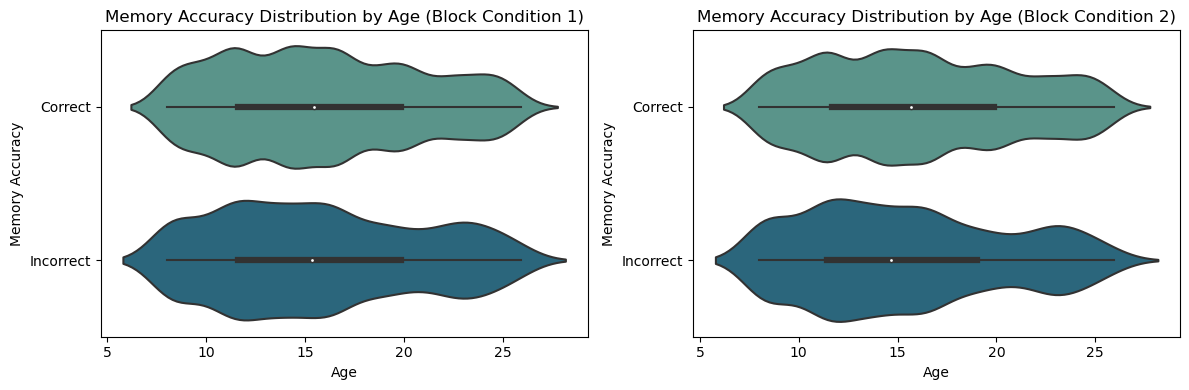

In [59]:
# violin plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.violinplot(data=memory_merged[memory_merged['block_condition'] == 1], x='age', y='mem_acc', palette='crest')
plt.title('Memory Accuracy Distribution by Age (Block Condition 1)')
plt.xlabel('Age')
plt.ylabel('Memory Accuracy')

plt.subplot(1, 2, 2)
sns.violinplot(data=memory_merged[memory_merged['block_condition'] == 2], x='age', y='mem_acc', palette='crest')
plt.title('Memory Accuracy Distribution by Age (Block Condition 2)')
plt.xlabel('Age')
plt.ylabel('Memory Accuracy')

plt.tight_layout()
plt.show()


### Final Inferences

**Age vs. Memory Accuracy:**
- The chi-square test reveals a significant relationship between age and memory accuracy, suggesting that age influences memory performance.

**Age vs. Memory Accuracy within Specificity Conditions:**
- Within the category predictive condition, there is no significant relationship between age and memory accuracy.
- However, within the exemplar predictive condition, there is a significant relationship between age and memory accuracy, indicating that memory performance varies with age in this condition.
- Pairwise comparisons between age groups within each specificity condition reveal age significantly influences adaptation towards specificity in memory representations in Block Condition 2, but not in Block Condition 1.

**Adaptation towards memory specificity increases with age, especially evident in the Exemplar Predictive condition. While age does not significantly impact memory accuracy in the Category Predictive condition, it significantly influences memory accuracy within Exemplar Predictive specificity.**

Overall, based on the results of the conducted analyses, we can reject the null hypothesis ($H_0$) and conclude that there is a significant relationship between age and memory accuracy, particularly within the exemplar predictive condition. 

**Therefore, adaptation towards specificity in memory representations appears to increase with age.** 